<a href="https://colab.research.google.com/github/eakubrakova/MFTI_2023/blob/main/Project_semester1_kubrakova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Продажи игр:
https://www.kaggle.com/datasets/gregorut/videogamesales

Цель: найти наиболее перспективный жанр игры для потенциальной разработки.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла в датафрейм
df = pd.read_csv('/content/vgsales.csv')
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


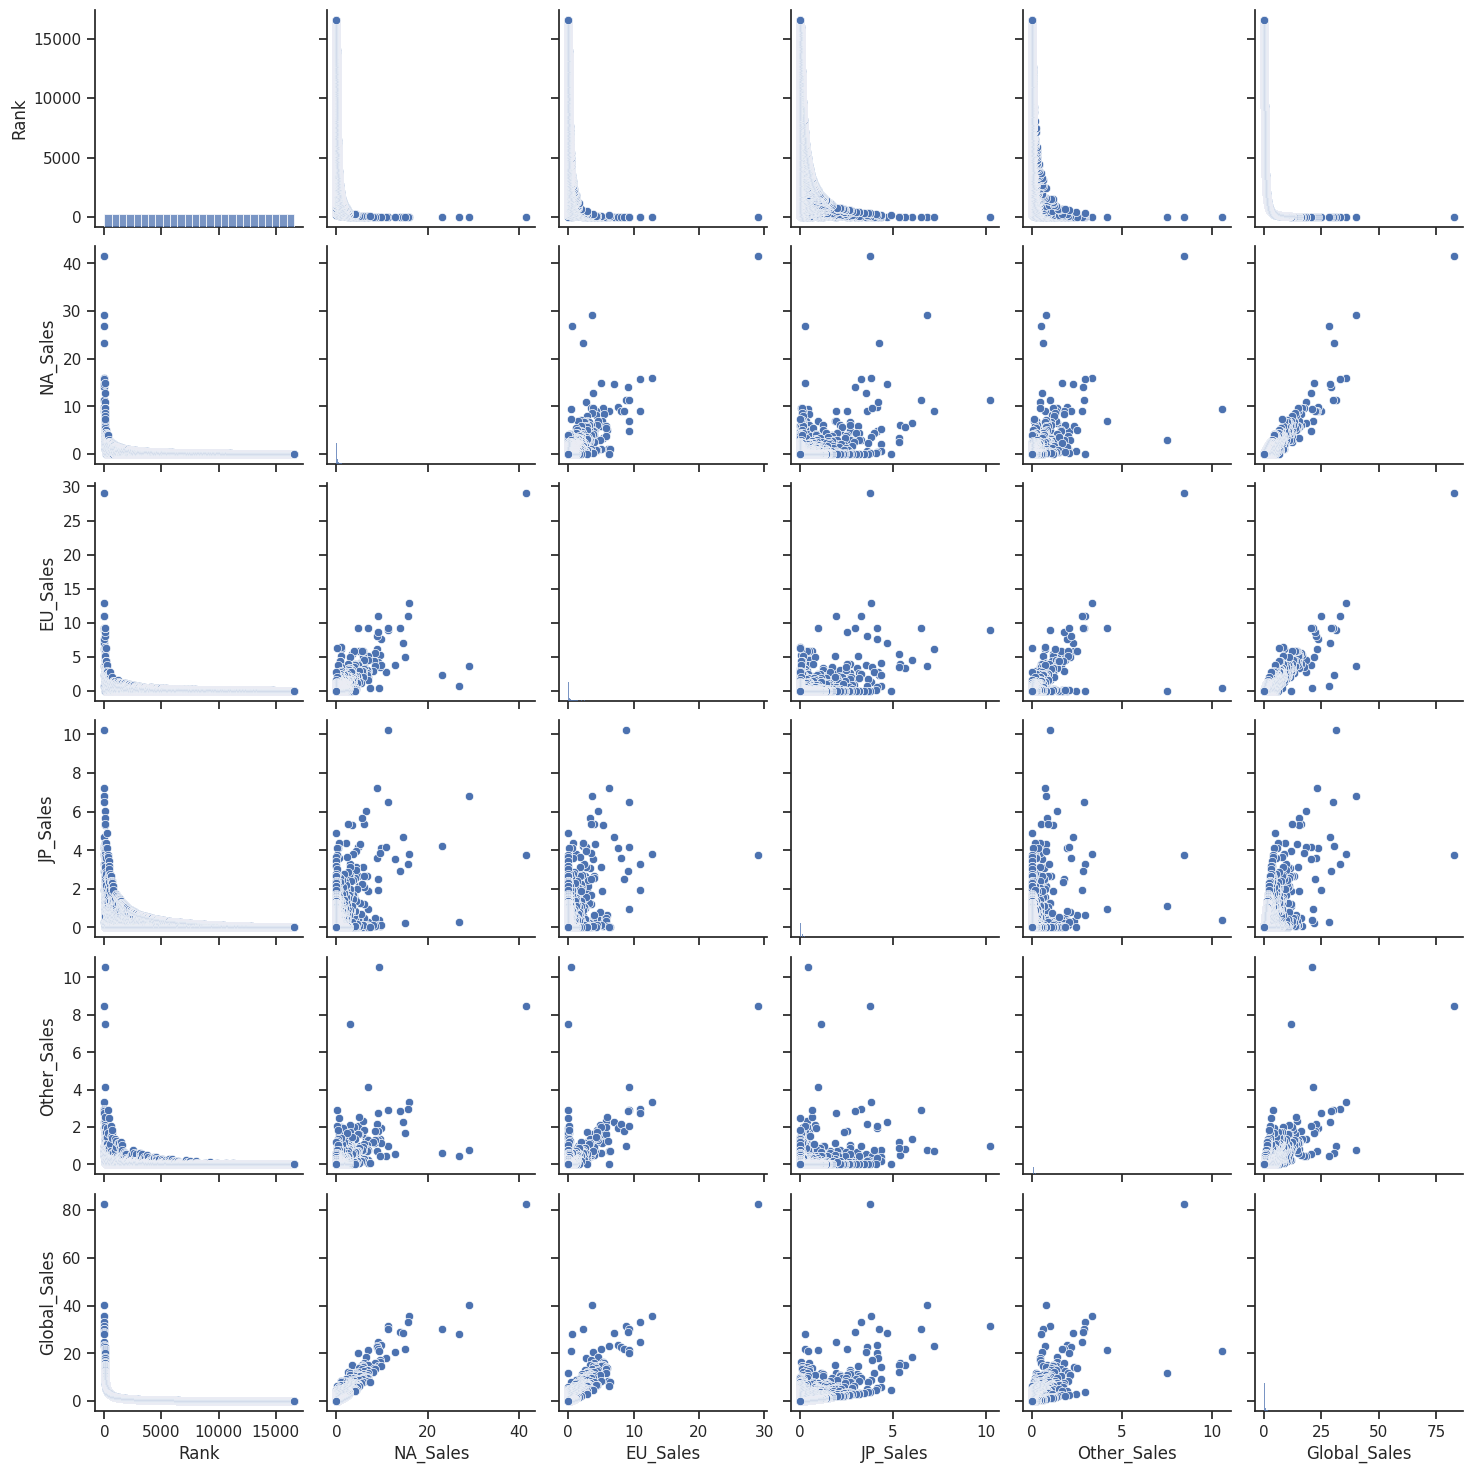

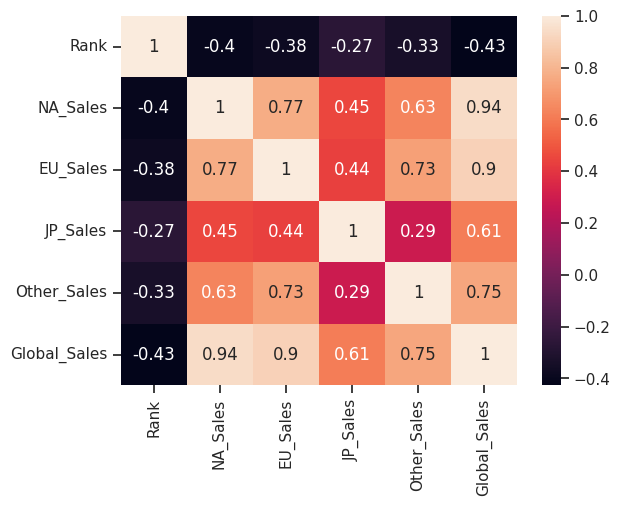

In [8]:
# Проверка типов данных и приведение их к нужному типу
df['Year'] = pd.to_datetime(df['Year'])
# Проверка наличия пропущенных значений и их обработка
if df.isnull().values.any():
    df = df.dropna()  # Удаление строк с пропущенными значениями
    # или
    df = df.fillna(0)  # Заполнение пропущенных значений нулями

# Проверка наличия дубликатов и их удаление
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

# Расчет основных статистических показателей для числовых переменных
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
statistics = df[numeric_columns].describe()

# Построение графиков
sns.set(style="ticks")
sns.pairplot(df[numeric_columns])
plt.show()

# Вычисление матрицы корреляции и построение heatmap
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



#  Общий вывод по исследуемому датасету

На основании данного датасета можно сделать следующие общие выводы:

1. Датасет содержит информацию о продажах видеоигр, включая различные аспекты, такие как название игры, платформа, год выпуска, жанр, продажи по регионам и общий объем продаж.

2. Также он содержит данные о видеоиграх, выпущенных в разные годы, начиная с 1980-х годов и до настоящего времени, т.е. довольно репрезентативная выборка.

3. В датасете присутствуют различные платформы, на которых были выпущены видеоигры, что при необходимости позволяет проводить анализ продаж по конкретным платформам.

4. Данные о продажах по регионам (Северная Америка, Европа, Япония и другие регионы) помогают понять географическое распределение продаж и выявить тенденции в разных регионах.

5. Также в датасете представлены жанры видеоигр, что позволяет анализировать их популярность и  влияние на объемы продаж, что поможет нам ответить на вопрос, какой из жанров наиболее перспективен для разработки. Для этого сгруппируем данные по жанрам и подсчитаем суммарный объем продаж.

In [9]:
# группировка данных по жанрам и подсчет суммарных продаж
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

# сортировка данных по убыванию и вывод первого элемента
most_popular_genre = genre_sales.sort_values(ascending=False).index[0]

print("Наиболее перспективный жанр для разработки игры -", most_popular_genre)


Наиболее перспективный жанр для разработки игры - Action


Посмотрим каков суммарный объем продаж по каждому из регионов.

In [10]:
# группировка данных по жанрам и подсчет суммарных продаж для каждой страны
genre_sales_by_country = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# определение самого перспективного жанра для каждой страны
most_popular_genre_by_country = genre_sales_by_country.idxmax()

print("Самый перспективный жанр игры в Северной Америке:", most_popular_genre_by_country['NA_Sales'])
print("Самый перспективный жанр игры в Европе:", most_popular_genre_by_country['EU_Sales'])
print("Самый перспективный жанр игры в Японии:", most_popular_genre_by_country['JP_Sales'])
print("Самый перспективный жанр игры в других регионах:", most_popular_genre_by_country['Other_Sales'])


Самый перспективный жанр игры в Северной Америке: Action
Самый перспективный жанр игры в Европе: Action
Самый перспективный жанр игры в Японии: Role-Playing
Самый перспективный жанр игры в других регионах: Action


              Global_Sales  Sales_pct
Genre                                
Action             1722.84  19.551133
Adventure           234.59   2.662174
Fighting            444.05   5.039168
Misc                789.87   8.963603
Platform            829.13   9.409133
Puzzle              242.21   2.748648
Racing              726.76   8.247418
Role-Playing        923.83  10.483808
Shooter            1026.20  11.645523
Simulation          389.98   4.425571
Sports             1309.24  14.857518
Strategy            173.27   1.966303


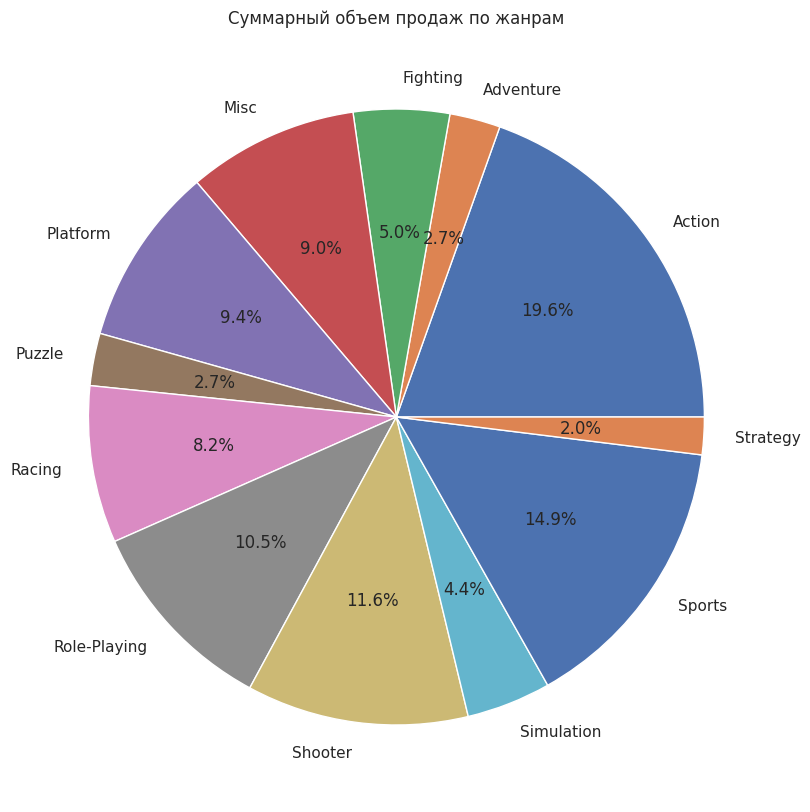

In [16]:
# группировка данных по жанрам и подсчет суммарных продаж
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

# вычисление процентного соотношения продаж для каждого жанра
genre_sales_pct = (genre_sales / genre_sales.sum()) * 100

# создание сводной таблицы
pivot_table = pd.pivot_table(df, values='Global_Sales', index='Genre', aggfunc='sum')

# добавление столбца с процентным соотношением продаж
pivot_table['Sales_pct'] = (pivot_table['Global_Sales'] / pivot_table['Global_Sales'].sum()) * 100

# вывод результатов на экран
print(pivot_table)

# построение графика для визуализации результатов
plt.figure(figsize=(10, 10))
plt.title('Суммарный объем продаж по жанрам')
plt.pie(genre_sales_pct, labels=genre_sales_pct.index, autopct='%1.1f%%')
plt.show()


Таким образом, мы можем сделать вывод, что глобально наиболее интересным и перспективным жанром для разработки игр будет Action. Далее можно обратить внимание на такие жанры как Sports, Shooter и Role-Playing (последний особенно для продаж в Японии). Наименее интересные для разработки жанры Strategy, Puzzle и Advenure.